In [187]:
import numpy as np
import pandas as pd

import xgboost

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

df = pd.read_csv('train.csv')
df.drop('Id',axis=1, inplace=True)
df_test = pd.read_csv('test.csv')
df_test.drop('Id',axis=1, inplace=True)
df_full = pd.concat([df,df_test])

In [188]:
df_full

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [189]:
df_numeric = df_full.select_dtypes(exclude=['object'])
df_cat = df_full.select_dtypes(include=['object'])

In [190]:
df_cat['Alley'].fillna('No', inplace=True)
df_cat['BsmtQual'].fillna('No', inplace=True)
df_cat['BsmtCond'].fillna('No', inplace=True)
df_cat['BsmtExposure'].fillna('No', inplace=True)
df_cat['MasVnrType'].fillna('No', inplace=True)
df_cat['Electrical'].fillna('SBrkr', inplace=True)
df_cat['FireplaceQu'].fillna('No', inplace=True)
df_cat['GarageType'].fillna('No', inplace=True)
df_cat['GarageFinish'].fillna('No', inplace=True)
df_cat['GarageQual'].fillna('No', inplace=True)
df_cat['GarageCond'].fillna('No', inplace=True)
df_cat['PoolQC'].fillna('No', inplace=True)
df_cat['Fence'].fillna('No', inplace=True)

C:\Users\NetDriver\AppData\Local\Temp\ipykernel_18504\1859693478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat['Alley'].fillna('No', inplace=True)
C:\Users\NetDriver\AppData\Local\Temp\ipykernel_18504\1859693478.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [191]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_cat['BsmtFinType1'])
le.classes_
BsmtFinType1 = le.transform(df_cat['BsmtFinType1'])
BsmtFinType1_df = pd.DataFrame(BsmtFinType1, columns=['BsmtFinType1_enum'])


le.fit(df_cat['BsmtFinType2'])
le.classes_
BsmtFinType2 = le.transform(df_cat['BsmtFinType2'])
BsmtFinType2_df = pd.DataFrame(BsmtFinType2, columns=['BsmtFinType2_enum'])
MiscFeature = pd.get_dummies(df_cat['MiscFeature'], columns=['MiscFeature'])

#df_combined = pd.concat([BsmtFinType1_df, BsmtFinType2_df, MiscFeature], axis=1)


In [192]:
df_combined = pd.concat([BsmtFinType1_df, BsmtFinType2_df], axis=1)

In [193]:
df_combined

,BsmtFinType1_enum,BsmtFinType2_enum
0,2,5
1,0,5
2,2,5
3,0,5
4,2,5
...,...,...
2914,5,5
2915,4,5
2916,0,5
2917,2,5


In [194]:
MiscFeature

,Gar2,Othr,Shed,TenC
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1454,False,False,False,False
1455,False,False,False,False
1456,False,False,False,False
1457,False,False,True,False


In [195]:
# Check for duplicate indices in df_combined
duplicates_combined = df_combined.index.duplicated()
print("Duplicate indices in df_combined:", duplicates_combined.any())

# Check for duplicate indices in MiscFeature
duplicates_misc = MiscFeature.index.duplicated()
print("Duplicate indices in MiscFeature:", duplicates_misc.any())

Duplicate indices in df_combined: False
Duplicate indices in MiscFeature: True


In [196]:
# If df_combined has duplicate indices, reset the index
if duplicates_combined.any():
    df_combined = df_combined.reset_index(drop=True)

# If MiscFeature has duplicate indices, reset the index
if duplicates_misc.any():
    MiscFeature = MiscFeature.reset_index(drop=True)

In [197]:
df_combined = pd.concat([df_combined, MiscFeature], axis=1)

In [198]:
df_combined

,BsmtFinType1_enum,BsmtFinType2_enum,Gar2,Othr,Shed,TenC
0,2,5,False,False,False,False
1,0,5,False,False,False,False
2,2,5,False,False,False,False
3,0,5,False,False,False,False
4,2,5,False,False,False,False
...,...,...,...,...,...,...
2914,5,5,False,False,False,False
2915,4,5,False,False,False,False
2916,0,5,False,False,False,False
2917,2,5,False,False,True,False


In [199]:
df_combined = df_combined.reset_index(drop=True)
df_cat = df_cat.reset_index(drop=True)

In [200]:
df = pd.concat([df_combined,df_cat], axis=1)

# Функция для обработки категориальных признаков
def encode_categorical_features(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            unique_values = df[column].nunique()
            if unique_values <= 5:
                # Применяем one-hot encoding
                df = pd.get_dummies(df, columns=[column])
            else:
                # Применяем label encoding
                le = LabelEncoder()
                df[column] = le.fit_transform(df[column])
    return df

# Применяем функцию к нашему DataFrame
df_encoded = encode_categorical_features(df)

print(df_encoded)

      BsmtFinType1_enum  BsmtFinType2_enum   Gar2   Othr   Shed   TenC  \
0                     2                  5  False  False  False  False   
1                     0                  5  False  False  False  False   
2                     2                  5  False  False  False  False   
3                     0                  5  False  False  False  False   
4                     2                  5  False  False  False  False   
...                 ...                ...    ...    ...    ...    ...   
2914                  5                  5  False  False  False  False   
2915                  4                  5  False  False  False  False   
2916                  0                  5  False  False  False  False   
2917                  2                  5  False  False   True  False   
2918                  3                  5  False  False  False  False   

      Neighborhood  Condition1  Condition2  HouseStyle  ...  PoolQC_No  \
0                5           2       

In [201]:
df_encoded

,BsmtFinType1_enum,BsmtFinType2_enum,Gar2,Othr,Shed,TenC,Neighborhood,Condition1,Condition2,HouseStyle,...,PoolQC_No,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,2,5,False,False,False,False,5,2,2,5,...,True,False,False,False,False,True,False,False,False,False
1,0,5,False,False,False,False,24,1,2,2,...,True,False,False,False,False,True,False,False,False,False
2,2,5,False,False,False,False,5,2,2,5,...,True,False,False,False,False,True,False,False,False,False
3,0,5,False,False,False,False,6,2,2,5,...,True,False,False,False,False,True,False,False,False,False
4,2,5,False,False,False,False,15,2,2,5,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,5,5,False,False,False,False,10,2,2,5,...,True,False,False,False,False,True,False,False,False,False
2915,4,5,False,False,False,False,10,2,2,5,...,True,False,False,False,False,True,False,False,False,False
2916,0,5,False,False,False,False,11,2,2,2,...,True,False,False,False,False,True,False,False,False,False
2917,2,5,False,False,True,False,11,2,2,6,...,True,False,False,True,False,False,False,False,True,False



BsmtFinType1 - 1234567
BsmtFinType2 - 1234567


In [202]:
estimator = RandomForestRegressor(n_estimators=10, random_state=0)
imputer = IterativeImputer(estimator=estimator, max_iter=10, random_state=0)
imputed_df_cat = df_encoded
imputed_df_cat

,BsmtFinType1_enum,BsmtFinType2_enum,Gar2,Othr,Shed,TenC,Neighborhood,Condition1,Condition2,HouseStyle,...,PoolQC_No,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,2,5,False,False,False,False,5,2,2,5,...,True,False,False,False,False,True,False,False,False,False
1,0,5,False,False,False,False,24,1,2,2,...,True,False,False,False,False,True,False,False,False,False
2,2,5,False,False,False,False,5,2,2,5,...,True,False,False,False,False,True,False,False,False,False
3,0,5,False,False,False,False,6,2,2,5,...,True,False,False,False,False,True,False,False,False,False
4,2,5,False,False,False,False,15,2,2,5,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,5,5,False,False,False,False,10,2,2,5,...,True,False,False,False,False,True,False,False,False,False
2915,4,5,False,False,False,False,10,2,2,5,...,True,False,False,False,False,True,False,False,False,False
2916,0,5,False,False,False,False,11,2,2,2,...,True,False,False,False,False,True,False,False,False,False
2917,2,5,False,False,True,False,11,2,2,6,...,True,False,False,True,False,False,False,False,True,False


Прекращаем работать с категориальными данными и переходим к численным

In [203]:
estimator = RandomForestRegressor(n_estimators=10, random_state=0)
imputer = IterativeImputer(estimator=estimator, max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(df_numeric)
imputed_df_num = pd.DataFrame(imputed_data, columns=df_numeric.columns)

c:\Users\NetDriver\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [204]:
ultimate_dataframe = pd.concat([imputed_df_cat,imputed_df_num], axis = 1)

In [205]:
ultimate_dataframe

,BsmtFinType1_enum,BsmtFinType2_enum,Gar2,Othr,Shed,TenC,Neighborhood,Condition1,Condition2,HouseStyle,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,2,5,False,False,False,False,5,2,2,5,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,0,5,False,False,False,False,24,1,2,2,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,2,5,False,False,False,False,5,2,2,5,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,0,5,False,False,False,False,6,2,2,5,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,2,5,False,False,False,False,15,2,2,5,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,5,5,False,False,False,False,10,2,2,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,88840.0
2915,4,5,False,False,False,False,10,2,2,5,...,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,87100.0
2916,0,5,False,False,False,False,11,2,2,2,...,474.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,162690.0
2917,2,5,False,False,True,False,11,2,2,6,...,80.0,32.0,0.0,0.0,0.0,0.0,700.0,7.0,2006.0,117035.0


In [206]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

data = ultimate_dataframe.copy()

contamination = 0.03  # предполагаемая доля выбросов
model = IsolationForest(contamination=contamination, random_state=42)
model.fit(data)

predictions = model.predict(data)


In [207]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [208]:
# Замена выбросов на NaN
df_no_outliers = data.copy()
# Преобразуем 1D предсказания в маску для замены выбросов
mask = predictions == -1
for column in df_no_outliers.columns:
    if column != 'MSSubClass' or 'YearBuilt':
        df_no_outliers.loc[mask, column] = np.nan

df_no_outliers

C:\Users\NetDriver\AppData\Local\Temp\ipykernel_18504\2300184606.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_no_outliers.loc[mask, column] = np.nan
C:\Users\NetDriver\AppData\Local\Temp\ipykernel_18504\2300184606.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_no_outliers.loc[mask, column] = np.nan
C:\Users\NetDriver\AppData\Local\Temp\ipykernel_18504\2300184606.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_no_outliers.loc[mask, column] = np

,BsmtFinType1_enum,BsmtFinType2_enum,Gar2,Othr,Shed,TenC,Neighborhood,Condition1,Condition2,HouseStyle,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,2.0,5.0,False,False,False,False,5.0,2.0,2.0,5.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,0.0,5.0,False,False,False,False,24.0,1.0,2.0,2.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,2.0,5.0,False,False,False,False,5.0,2.0,2.0,5.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,0.0,5.0,False,False,False,False,6.0,2.0,2.0,5.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,2.0,5.0,False,False,False,False,15.0,2.0,2.0,5.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,5.0,5.0,False,False,False,False,10.0,2.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,88840.0
2915,4.0,5.0,False,False,False,False,10.0,2.0,2.0,5.0,...,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,87100.0
2916,0.0,5.0,False,False,False,False,11.0,2.0,2.0,2.0,...,474.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,162690.0
2917,2.0,5.0,False,False,True,False,11.0,2.0,2.0,6.0,...,80.0,32.0,0.0,0.0,0.0,0.0,700.0,7.0,2006.0,117035.0


In [209]:
imputed_data1 = imputer.fit_transform(df_no_outliers)
imputed_df1 = pd.DataFrame(imputed_data1, columns=ultimate_dataframe.columns)
imputed_df1

,BsmtFinType1_enum,BsmtFinType2_enum,Gar2,Othr,Shed,TenC,Neighborhood,Condition1,Condition2,HouseStyle,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,2.0,5.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,5.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,0.0,5.0,0.0,0.0,0.0,0.0,24.0,1.0,2.0,2.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,2.0,5.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,5.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,0.0,5.0,0.0,0.0,0.0,0.0,6.0,2.0,2.0,5.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,2.0,5.0,0.0,0.0,0.0,0.0,15.0,2.0,2.0,5.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,5.0,5.0,0.0,0.0,0.0,0.0,10.0,2.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,88840.0
2915,4.0,5.0,0.0,0.0,0.0,0.0,10.0,2.0,2.0,5.0,...,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,87100.0
2916,0.0,5.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,2.0,...,474.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,162690.0
2917,2.0,5.0,0.0,0.0,1.0,0.0,11.0,2.0,2.0,6.0,...,80.0,32.0,0.0,0.0,0.0,0.0,700.0,7.0,2006.0,117035.0


In [279]:
X = imputed_df1.drop('SalePrice', axis=1)
y = imputed_df1['SalePrice']


In [280]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=942)
X_train = X.head(1461)
y_train = y.head(1461)

In [281]:
X_test = X.tail(1459)
Y_test = y.tail(1459)

In [282]:
Y_test

1460    135255.0
1461    149650.0
1462    187633.4
1463    183440.0
1464    201630.0
          ...   
2914     88840.0
2915     87100.0
2916    162690.0
2917    117035.0
2918    230100.9
Name: SalePrice, Length: 1459, dtype: float64

In [283]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Шаг масштабирования
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror'))  # Модель XGBoost
])
# Определите диапазоны гиперпараметров
param_grid = {
    'xgb__n_estimators': [500, 650, 800],
    'xgb__max_depth': [3,],
    'xgb__learning_rate': [0.1],
    'xgb__subsample': [0.6],
    'xgb__colsample_bytree': [0.5, 0.6]
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Выполните поиск
grid_search.fit(X_train, y_train)

# Выведите лучшие гиперпараметры
print("Best parameters found: ", grid_search.best_params_)

# Получите лучшее значение и модель
best_model = grid_search.best_estimator_

'''
# Выполните предсказание на тестовых данных
y_pred = best_model.predict(X_test)

# Рассчитайте метрики
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Выведите метрики
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")
'''

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:  {'xgb__colsample_bytree': 0.5, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 500, 'xgb__subsample': 0.6}


'\n# Выполните предсказание на тестовых данных\ny_pred = best_model.predict(X_test)\n\n# Рассчитайте метрики\nmae = mean_absolute_error(y_test, y_pred)\nmse = mean_squared_error(y_test, y_pred)\nrmse = mse ** 0.5\nr2 = r2_score(y_test, y_pred)\n\n# Выведите метрики\nprint(f"Mean Absolute Error (MAE): {mae:.4f}")\nprint(f"Mean Squared Error (MSE): {mse:.4f}")\nprint(f"Root Mean Squared Error (RMSE): {rmse:.4f}")\nprint(f"R^2 Score: {r2:.4f}")\n'

In [284]:
X_train_reduced

,BsmtFinType1_enum,Neighborhood,Condition1,Condition2,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Foundation,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MoSold,YrSold
0,2.0,5.0,2.0,2.0,5.0,1.0,1.0,12.0,13.0,2.0,...,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,2.0,2008.0
1,0.0,24.0,1.0,2.0,2.0,1.0,1.0,8.0,8.0,1.0,...,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,5.0,2007.0
2,2.0,5.0,2.0,2.0,5.0,1.0,1.0,12.0,13.0,2.0,...,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,9.0,2008.0
3,0.0,6.0,2.0,2.0,5.0,1.0,1.0,13.0,15.0,0.0,...,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,0.0,2.0,2006.0
4,2.0,15.0,2.0,2.0,5.0,1.0,1.0,12.0,13.0,2.0,...,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.0,14.0,2.0,2.0,2.0,1.0,1.0,9.0,10.0,1.0,...,7.0,2.0,1978.0,2.0,500.0,349.0,0.0,0.0,2.0,2010.0
1457,2.0,6.0,2.0,2.0,5.0,1.0,1.0,5.0,5.0,4.0,...,9.0,2.0,1941.0,1.0,252.0,0.0,60.0,0.0,5.0,2010.0
1458,2.0,12.0,2.0,2.0,2.0,3.0,1.0,8.0,8.0,1.0,...,5.0,0.0,1950.0,1.0,240.0,366.0,0.0,0.0,4.0,2010.0
1459,1.0,7.0,2.0,2.0,2.0,1.0,1.0,6.0,6.0,1.0,...,6.0,0.0,1965.0,1.0,276.0,736.0,68.0,0.0,6.0,2008.0


<Axes: >

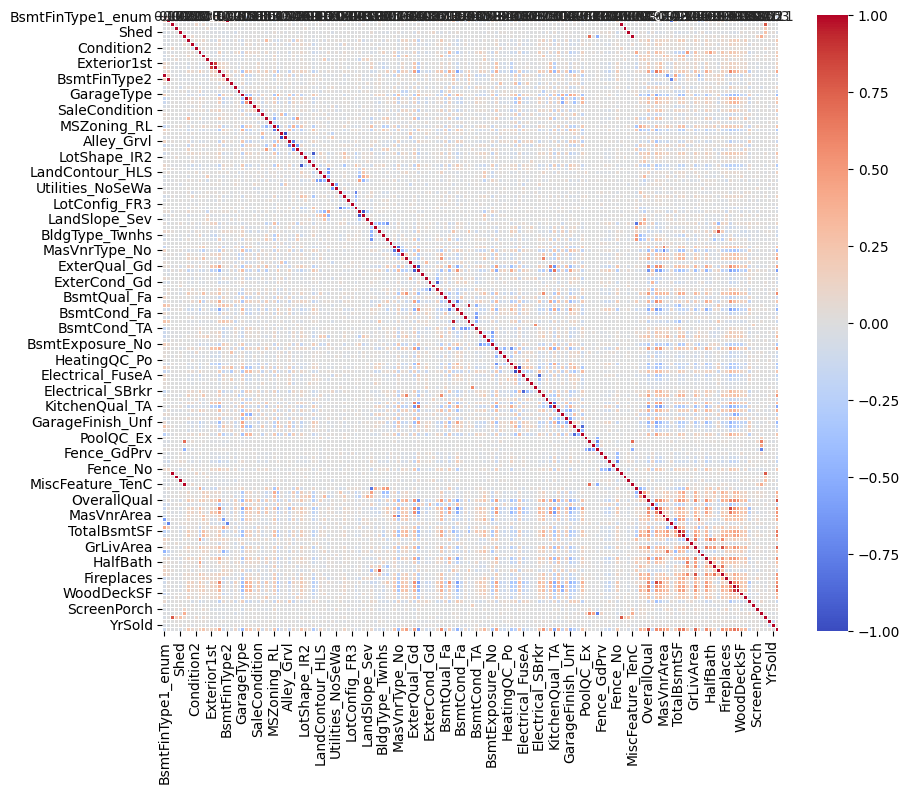

In [285]:
corr_matrix = imputed_df1.corr()

# Создайте тепловую карту (heatmap) для корреляционной матрицы
plt.figure(figsize=(10, 8))  # Установите размер фигуры
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,

            linewidths=0.5, fmt='.2f', square=True)

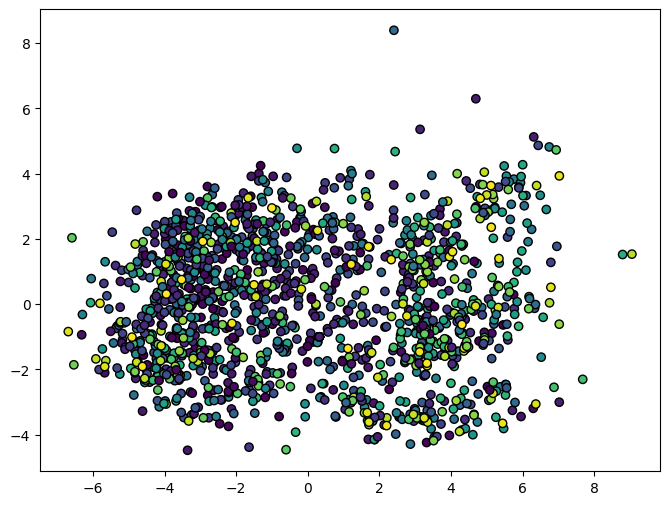

In [286]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_regression

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация первых двух компонент PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y_train)[0], edgecolor='k')
plt.show()


Отобранные признаки:
               Feature  Importance
124        OverallQual    0.675608
6         Neighborhood    0.604863
136          GrLivArea    0.562859
132        TotalBsmtSF    0.443796
147         GarageArea    0.440922
126          YearBuilt    0.436408
133           1stFlrSF    0.387588
146         GarageCars    0.365285
145        GarageYrBlt    0.359452
19         FireplaceQu    0.337056
127       YearRemodAdd    0.332355
14          Foundation    0.326263
143       TotRmsAbvGrd    0.323985
121         MSSubClass    0.309593
122        LotFrontage    0.306318
134           2ndFlrSF    0.301773
139           FullBath    0.282730
65        ExterQual_TA    0.278990
149        OpenPorchSF    0.256097
123            LotArea    0.248471
100     KitchenQual_TA    0.230816
129         BsmtFinSF1    0.227663
131          BsmtUnfSF    0.215866
125        OverallCond    0.214307
64        ExterQual_Gd    0.213785
0    BsmtFinType1_enum    0.211918
15        BsmtFinType1    0.210055

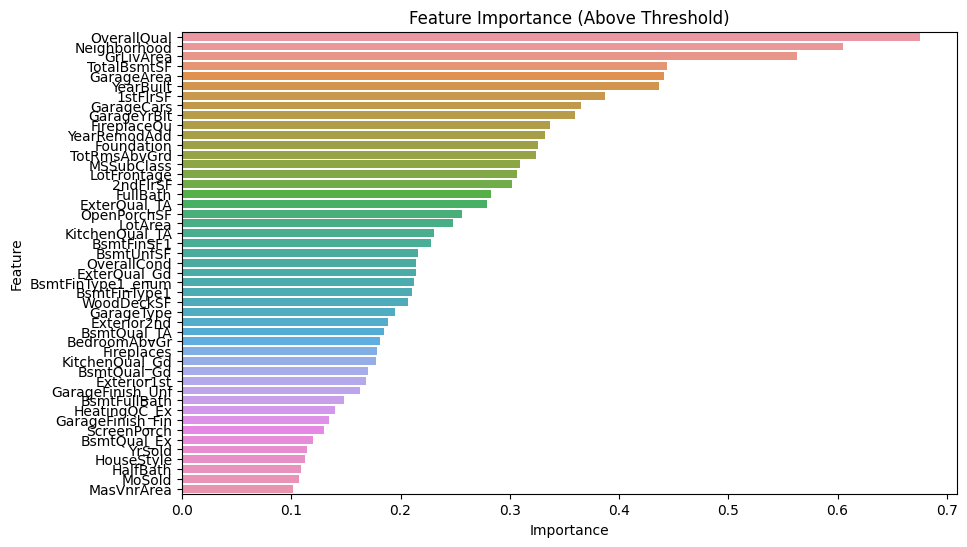

In [278]:
selector = SelectKBest(score_func=mutual_info_regression, k='all')
X_new = selector.fit_transform(X_scaled, y_train)
scores = selector.scores_
scores

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': scores
}).sort_values(by='Importance', ascending=False)

threshold = 0.1 

# Отберите признаки, важность которых превышает порог
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

# Выберите имена отобранных признаков
selected_feature_names = selected_features['Feature']

# Создайте новый DataFrame только с отобранными признаками
X_selected = X[selected_feature_names]
new_df = pd.concat([X_selected, y.reset_index(drop=True)], axis=1)  # Включите целевую переменную при необходимости

# Вывод результатов
print("Отобранные признаки:")
print(selected_features)

print("\nНовый DataFrame с отобранными признаками:")
print(new_df.head())

# Визуализация важности отобранных признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=selected_features)
plt.title('Feature Importance (Above Threshold)')
plt.show()

In [275]:
new_df

KeyError: "['ExterQual_TA', 'KitchenQual_TA', 'BsmtFinType1_enum', 'ExterQual_Gd', 'BsmtQual_TA', 'KitchenQual_Gd', 'BsmtQual_Gd', 'GarageFinish_Unf', 'GarageFinish_Fin', 'HeatingQC_Ex', 'BsmtQual_Ex'] not in index"

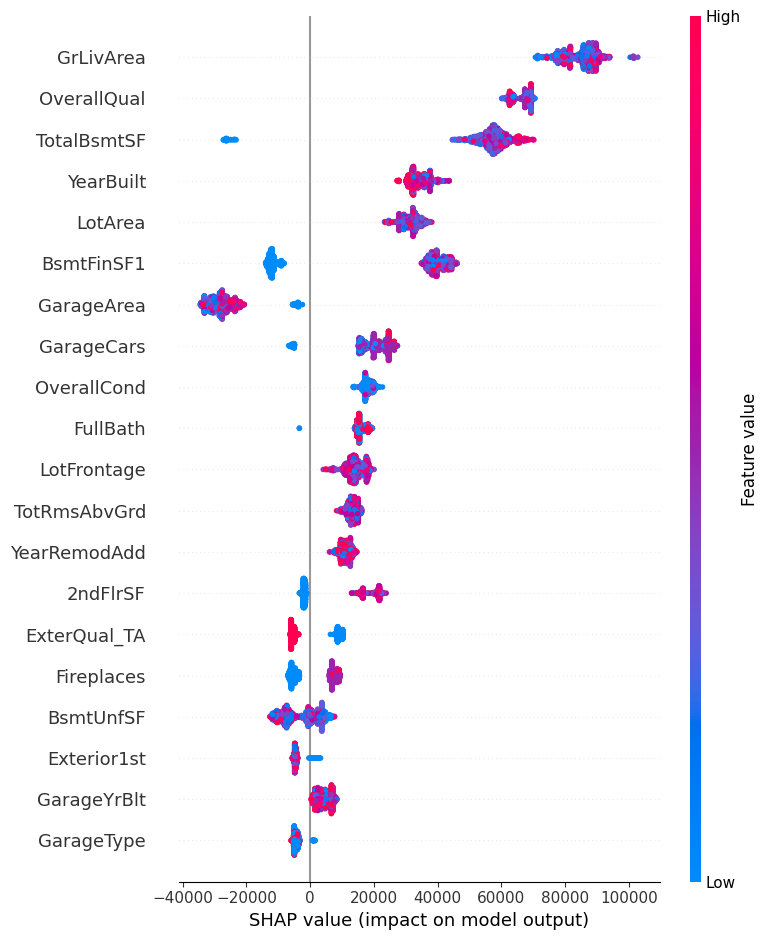

In [287]:
import shap

xgb_model = best_model.named_steps['xgb']
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# Визуализация важности признаков
shap.summary_plot(shap_values, X_test)

In [288]:
# Определение порога для отсечения

percentage = 0.4  # Оставляем 1% самых важных признаков
threshold = np.percentile(mean_abs_shap, 100 * (1 - percentage))
important_features = [i for i in range(len(mean_abs_shap)) if mean_abs_shap[i] > threshold]

if isinstance(X_train, pd.DataFrame):
    X_train_reduced = X_train.iloc[:, important_features]
    X_test_reduced = X_test.iloc[:, important_features]
else:
    # Если X_train и X_test являются numpy массивами
    X_train_reduced = X_train[:, important_features]
    X_test_reduced = X_test[:, important_features]

print("Selected features:", important_features)

Selected features: [0, 2, 3, 4, 5, 7, 8, 10, 12, 14, 15, 16, 17, 19, 21, 22, 23, 32, 35]


In [227]:
X_train= X_train_reduced
X_test = X_test_reduced

In [289]:
important_features.__len__()

19

In [290]:
df = pd.read_csv('test.csv')
df_id = df['Id']
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [291]:
df_id = pd.read_csv('test.csv')
df_id = df_id['Id']
df_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [293]:
y = best_model.predict(X_test)
result = pd.DataFrame(y)

In [294]:
df_combined = pd.concat([df_id, result], axis=1)

In [ ]:
ultimate_test_dataframe

NameError: name 'ultimate_test_dataframe' is not defined

In [295]:
ultimate_dataframe

,BsmtFinType1_enum,BsmtFinType2_enum,Gar2,Othr,Shed,TenC,Neighborhood,Condition1,Condition2,HouseStyle,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,2,5,False,False,False,False,5,2,2,5,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,0,5,False,False,False,False,24,1,2,2,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,2,5,False,False,False,False,5,2,2,5,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,0,5,False,False,False,False,6,2,2,5,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,2,5,False,False,False,False,15,2,2,5,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,5,5,False,False,False,False,10,2,2,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,88840.0
2915,4,5,False,False,False,False,10,2,2,5,...,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,87100.0
2916,0,5,False,False,False,False,11,2,2,2,...,474.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,162690.0
2917,2,5,False,False,True,False,11,2,2,6,...,80.0,32.0,0.0,0.0,0.0,0.0,700.0,7.0,2006.0,117035.0


In [296]:

df_id = pd.read_csv('test.csv')
df_id = df_id['Id']
df_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [297]:
df_combined = df_combined.rename(columns={0: 'SalePrice'})

In [298]:
df_combined

,Id,SalePrice
0,1461,132716.000000
1,1462,162981.890625
2,1463,184797.937500
3,1464,198101.937500
4,1465,185769.437500
...,...,...
1454,2915,77509.132812
1455,2916,82238.492188
1456,2917,166696.281250
1457,2918,118596.679688


In [299]:
df_combined.to_csv('output.csv', index=False)